In [118]:
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import RobustScaler

In [119]:
# Which components of a song has the biggest and smallest effect on its popularity? 
path = 'spotify_yt.xlsx'
df_og = pd.read_excel(path)

In [120]:
df = df_og.copy()

In [121]:
df.head()

,Unnamed: 0,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,1.0,1.0,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,1.0,1.0,3.100837e+08
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,1.0,1.0,6.306347e+07
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,1.0,1.0,4.346636e+08
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,1.0,1.0,6.172597e+08


In [122]:
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns=str.lower)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20718 non-null  object 
 1   track             20717 non-null  object 
 2   album             20708 non-null  object 
 3   album_type        20718 non-null  object 
 4   danceability      20716 non-null  float64
 5   energy            20716 non-null  float64
 6   key               20716 non-null  float64
 7   loudness          20716 non-null  float64
 8   speechiness       20716 non-null  float64
 9   acousticness      20716 non-null  float64
 10  instrumentalness  20716 non-null  float64
 11  liveness          20716 non-null  float64
 12  valence           20716 non-null  float64
 13  tempo             20716 non-null  float64
 14  duration_ms       20716 non-null  float64
 15  title             20247 non-null  object 
 16  channel           20248 non-null  object

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,20716.0,6.197775e-01,1.652724e-01,0.000000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
energy,20716.0,6.352503e-01,2.141468e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
key,20716.0,5.300348e+00,3.576449e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
loudness,20716.0,-7.671680e+00,4.632749e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931000e+00,9.200000e-01
speechiness,20716.0,9.645601e-02,1.119600e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
acousticness,20716.0,2.915353e-01,2.862988e-01,0.000001,4.520000e-02,1.930000e-01,4.772500e-01,9.960000e-01
instrumentalness,20716.0,5.596156e-02,1.932620e-01,0.000000,0.000000e+00,2.405000e-06,4.630000e-04,1.000000e+00
liveness,20716.0,1.935210e-01,1.685309e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
valence,20716.0,5.298533e-01,2.454408e-01,0.000000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01
tempo,20716.0,1.206383e+02,2.957902e+01,0.000000,9.700200e+01,1.199650e+02,1.399350e+02,2.433720e+02


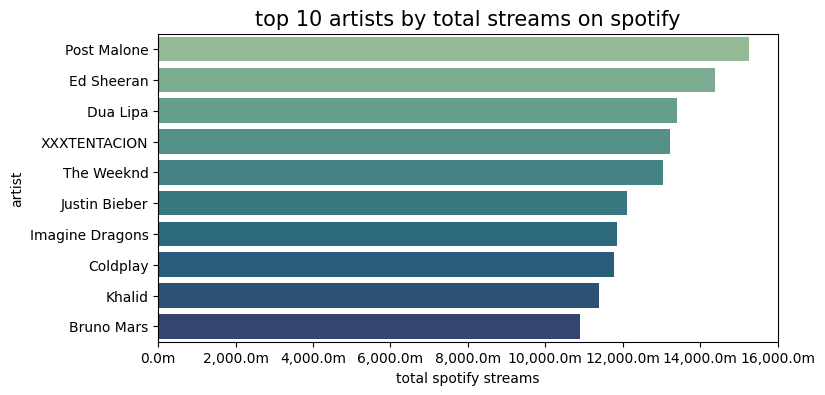

In [125]:
df2 = df.groupby('artist')['stream'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df2.values, y=df2.index, orient='h', ax=ax, palette='crest')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}m'.format(x*1e-6)))
ax.set_title('top 10 artists by total streams on spotify', fontsize=15)
ax.set_xlabel('total spotify streams', fontsize=10)

plt.show()

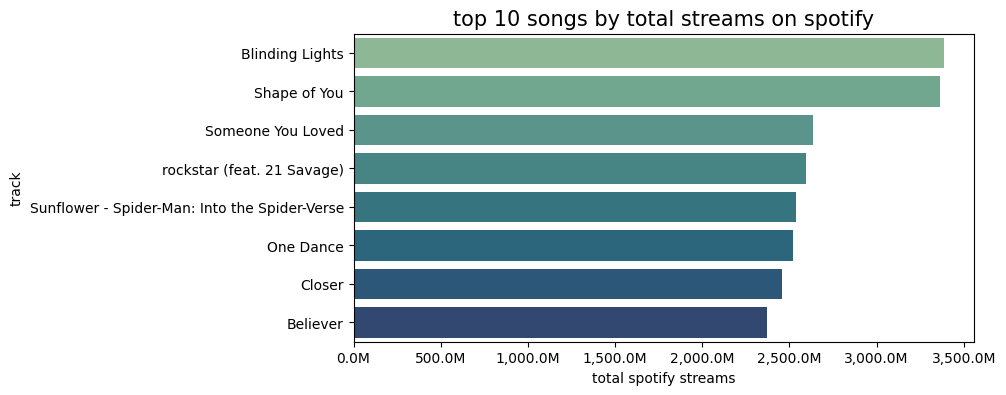

In [126]:
df3 = df.sort_values('stream', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df3['stream'], y=df3['track'], orient='h', ax=ax, palette='crest')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
ax.set_title('top 10 songs by total streams on spotify', fontsize=15)
ax.set_xlabel('total spotify streams', fontsize=10)

plt.show()

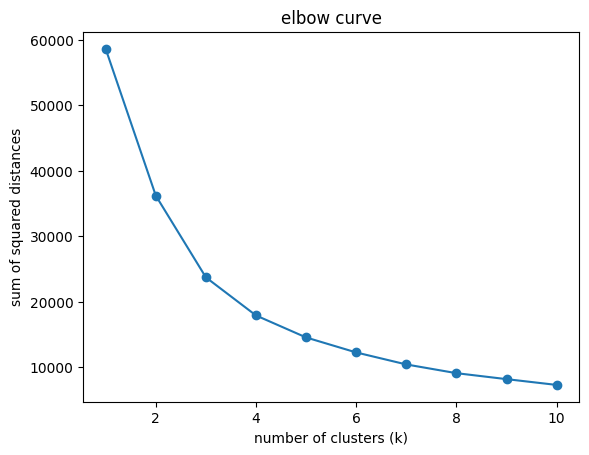

In [127]:
df = df.dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['stream','comments','likes']])

imputer = SimpleImputer(strategy='mean')
scaled_features = imputer.fit_transform(scaled_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('elbow curve')
plt.xlabel('number of clusters (k)')
plt.ylabel('sum of squared distances')
plt.show()

In [138]:
# k = 5
num_cols = df.drop(columns=['licensed', 'official_video']).select_dtypes(include=['int64', 'float64']).columns
df4 = df[num_cols].copy()

In [139]:
df4

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


In [140]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df4['popularity_cluster'] = kmeans.fit_predict(principal_components)
df4['stream'].groupby(df4['popularity_cluster']).mean()

popularity_cluster
0    5.673137e+07
1    1.419546e+09
2    1.041110e+09
3    9.385991e+08
4    3.590578e+08
Name: stream, dtype: float64

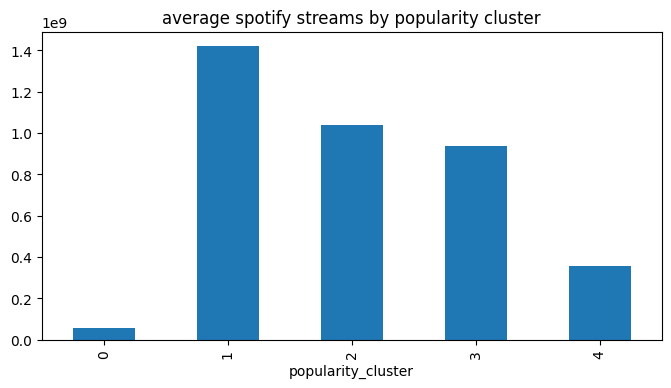

In [141]:
df4.groupby('popularity_cluster')['stream'].mean().plot(kind='bar', figsize=(8,4), title='average spotify streams by popularity cluster')
plt.show()

In [142]:
map = { 0:'low_popularity', 1:'high_popularity',  2:'midium_popularity', 3:'medium_popularity', 4:'low_popularity'}
df4['popularity_group'] = df4['popularity_cluster'].map(map)

In [143]:
df4.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,stream,popularity_cluster,popularity_group
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09,3,medium_popularity
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08,4,low_popularity
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,0,low_popularity
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08,4,low_popularity
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08,3,medium_popularity


In [144]:
df4.drop(columns=['popularity_group','popularity_cluster']).dropna().corr().round(2)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,stream
danceability,1.00,0.24,0.04,0.36,0.23,-0.28,-0.32,-0.08,0.46,-0.06,-0.09,0.09,0.10,0.04,0.07
energy,0.24,1.00,0.03,0.75,0.09,-0.66,-0.32,0.17,0.39,0.16,0.02,0.07,0.06,0.05,0.04
key,0.04,0.03,1.00,0.03,0.02,-0.03,0.00,-0.01,0.04,0.00,0.00,0.01,0.01,0.01,-0.01
loudness,0.36,0.75,0.03,1.00,0.07,-0.55,-0.56,0.09,0.32,0.14,0.01,0.12,0.12,0.06,0.12
speechiness,0.23,0.09,0.02,0.07,1.00,-0.10,-0.11,0.07,0.06,0.05,-0.05,-0.01,0.01,0.01,-0.02
acousticness,-0.28,-0.66,-0.03,-0.55,-0.10,1.00,0.28,-0.05,-0.21,-0.13,-0.02,-0.07,-0.08,-0.05,-0.10
instrumentalness,-0.32,-0.32,0.00,-0.56,-0.11,0.28,1.00,-0.06,-0.27,-0.08,-0.01,-0.08,-0.08,-0.03,-0.09
liveness,-0.08,0.17,-0.01,0.09,0.07,-0.05,-0.06,1.00,0.03,0.01,-0.00,-0.02,-0.02,-0.01,-0.04
valence,0.46,0.39,0.04,0.32,0.06,-0.21,-0.27,0.03,1.00,0.09,-0.05,0.04,0.01,0.02,-0.01
tempo,-0.06,0.16,0.00,0.14,0.05,-0.13,-0.08,0.01,0.09,1.00,-0.01,-0.00,0.00,0.01,0.00


In [145]:
df4.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'views', 'likes', 'comments', 'stream',
       'popularity_cluster', 'popularity_group'],
      dtype='object')

In [146]:
scaler = RobustScaler()

x = df4[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
y = df4['popularity_group']

information_gain = SelectKBest(score_func=mutual_info_classif, k='all')
information_gain.fit(x, y)
information_gain_scores = information_gain.scores_

feature_scores = pd.DataFrame({
    'feature': x.columns,
    'information gain': information_gain_scores
})

feature_scores = feature_scores.sort_values(by='information gain', ascending=False)

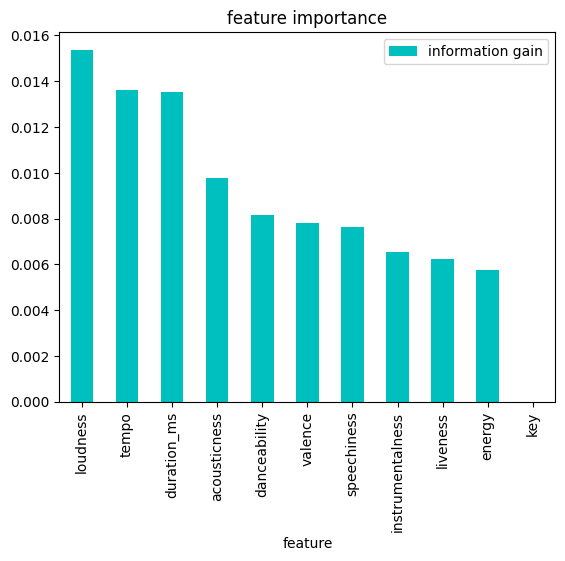

In [147]:
feature_scores.plot(x='feature', y='information gain', kind='bar', color='c')
plt.title('feature importance')
plt.show()